# NASCAR Race Car Performance

Your racing team is considering a new carburator design for their Nascar racing car. The manufacturer has provided the test data from a different car that raced this carburator design already. The data has a few columns of mechanic's notes on inspection after the race. Unfortunately, this data is all there is and the pit crew is asking you for recommendations based on only this data. 

The next race is coming up, should the team enter or not with the new carburator?

In [1]:
from astropy.io import ascii
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
rcParams["savefig.dpi"] = 150
rcParams["figure.dpi"] = 150
rcParams["font.size"] = 12
rcParams['savefig.bbox'] = 'tight'
from scipy import stats
import pandas as pd
data = ascii.read("data.csv")
# data = data[np.where(data['fail']==0.)]

In [2]:
data

day,month,year,temp,pres,fail,n,erosion,blowby,damage
int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
4,12,81,66,50,0,6,0,0,0
11,12,81,70,50,1,6,1,0,4
3,22,82,69,50,0,6,0,0,0
11,11,82,68,50,0,6,0,0,0
4,4,83,67,50,0,6,0,0,0
6,18,83,72,50,0,6,0,0,0
8,30,83,73,50,0,6,0,0,0
11,28,83,70,100,0,6,0,0,0
2,3,84,57,100,1,6,1,0,4


### Exercise 1

How many races has the car run? 

*student answer here*
23

### Exercise 2

Convert the day/month/year columns into a single decimal 'date' entry in the data. 

In [10]:
# student answer here
data['date'] = data['year']+data['month']/12.+data['day']/365.

### Exercise 3

Plot the date on the x-axis and the outside temperature on the y-axis. [if you could not generate a 'date' column in exercise 2, use the year for the rest of the questions.]

Text(0, 0.5, 'Temperature')

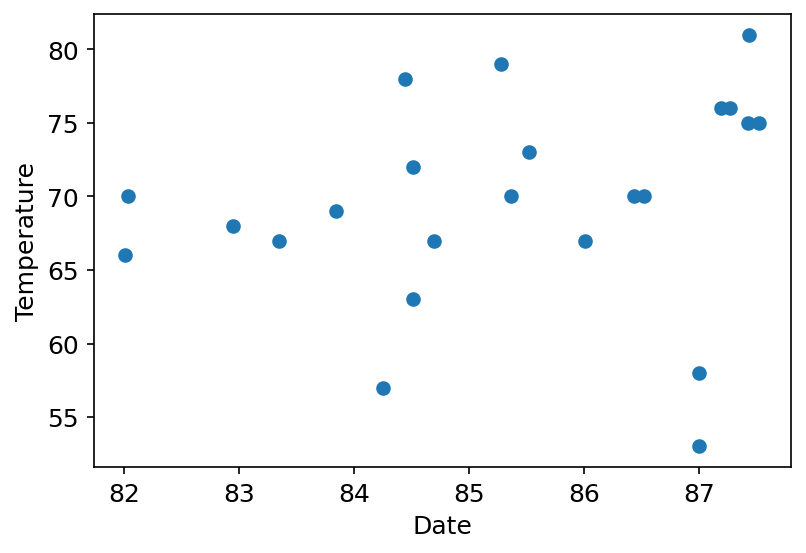

In [20]:
# student answer here
x = data['date']
y = data['temp']
plt.scatter(x, y)
plt.xlabel('Date')
plt.ylabel('Temperature')


### Exercise 4

Based on the range of values, what unit is the air temperature reported in? 

*student answer here*
Fahrenheit

### Exercise 5

Plot date and the three different notes that the mechanics have made upon inspection after each race ('erosion', 'blowby' and 'damage'). Plot each such that the viewer can immediate differentiate each note.

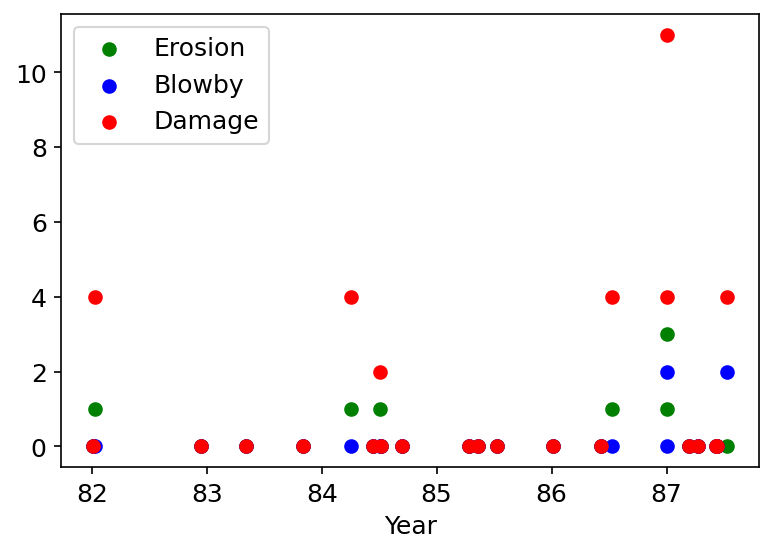

In [18]:
# student answer
x = data['date']
y = data['erosion']
z = data['blowby']
t = data['damage']
plt.scatter(x, y, color='green', label='Erosion')
plt.scatter(x, z, color='blue', label='Blowby')
plt.scatter(x, t, color='red', label='Damage')
plt.xlabel('Year')
plt.legend()

### Exercise 6

Evaluating the mechanic's notes, does the carburator show evidence of much wear over time? Or do you think it was regularly replaced? Motivate your answer.

*student answer here*
The carborator does not seem to show much wear over time. It seems like it was replaced regularly

### Exercise 7

using the pearson and spearman rankings for these three notes, is there a correlation with date?
Print using a for loop and format strings to make a neat and legible table.

In [37]:
# student work here
notes = ['erosion', 'blowby', 'damage']
for i in notes:
    pearson, pval = stats.pearsonr(data['date'], data[i])
    print('Pearson: %5s %5s: %4.5f \t %4.5f' % (data['date'], i, pearson,pval))
for h in notes: 
    spearman, pval = stats.spearmanr(data['date'], data[i])
    print('Sperman: %5s %5s: %4.5f \t %4.5f' % (data['date'], i, spearman,pval))

Pearson:        date      
-----------------
82.01095890410959
82.03013698630137
83.84155251141551
82.94680365296804
83.34429223744291
84.51643835616439
85.52191780821917
 85.3634703196347
 84.2554794520548
84.51095890410959
86.52191780821917
84.44406392694064
84.69680365296804
 87.0027397260274
86.01095890410959
87.42762557077626
86.43310502283106
87.43584474885846
87.27191780821917
85.27739726027397
87.52739726027397
87.19680365296804
 87.0027397260274 erosion: 0.09803 	 0.65632
Pearson:        date      
-----------------
82.01095890410959
82.03013698630137
83.84155251141551
82.94680365296804
83.34429223744291
84.51643835616439
85.52191780821917
 85.3634703196347
 84.2554794520548
84.51095890410959
86.52191780821917
84.44406392694064
84.69680365296804
 87.0027397260274
86.01095890410959
87.42762557077626
86.43310502283106
87.43584474885846
87.27191780821917
85.27739726027397
87.52739726027397
87.19680365296804
 87.0027397260274 blowby: 0.34968 	 0.10192
Pearson:        date      
--

### Exercise 8

Are any of the correlations significant? 

*student answer here*
No

### Exercise 9

Plot temperature and the three different notes that the mechanics have made upon inspection after each race ('erosion', 'blowby' and 'damage'). Plot each such that the viewer can immediate differentiate each note.

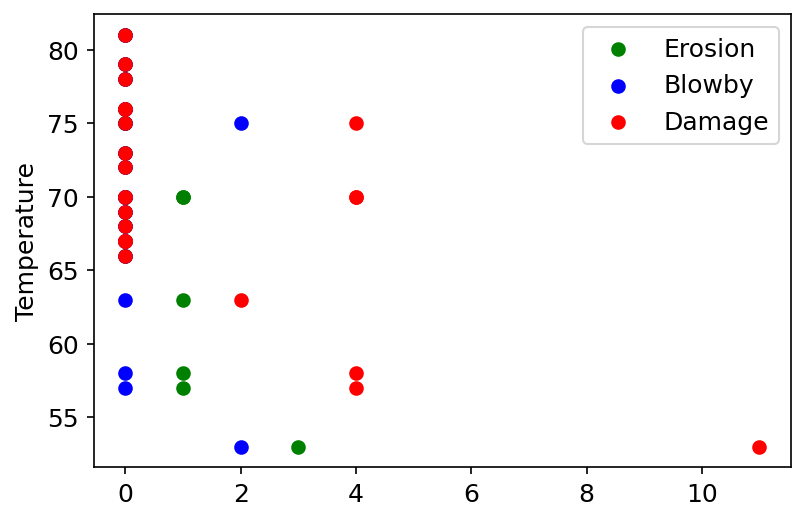

In [19]:
# student work here
j = data['temp']
plt.scatter(y, j, color='green', label='Erosion')
plt.scatter(z, j, color='blue', label='Blowby')
plt.scatter(t, j, color='red', label='Damage')
plt.ylabel('Temperature')
plt.legend()

### Exercise 10

Using the pearson and spearman rankings for these three notes, is there a correlation with temperature?
Print using a for loop and format strings to make a neat and legible table.

In [38]:
# student work here
for i in notes:
    pearson, pval = stats.pearsonr(data['temp'], data[i])
    print('Pearson: %5s %5s: %4.5f \t %4.5f' % (data['date'], i, pearson,pval))
for h in notes: 
    spearman, pval = stats.spearmanr(data['temp'], data[i])
    print('Sperman: %5s %5s: %4.5f \t %4.5f' % (data['date'], i, spearman,pval))

Pearson:        date      
-----------------
82.01095890410959
82.03013698630137
83.84155251141551
82.94680365296804
83.34429223744291
84.51643835616439
85.52191780821917
 85.3634703196347
 84.2554794520548
84.51095890410959
86.52191780821917
84.44406392694064
84.69680365296804
 87.0027397260274
86.01095890410959
87.42762557077626
86.43310502283106
87.43584474885846
87.27191780821917
85.27739726027397
87.52739726027397
87.19680365296804
 87.0027397260274 erosion: -0.71730 	 0.00012
Pearson:        date      
-----------------
82.01095890410959
82.03013698630137
83.84155251141551
82.94680365296804
83.34429223744291
84.51643835616439
85.52191780821917
 85.3634703196347
 84.2554794520548
84.51095890410959
86.52191780821917
84.44406392694064
84.69680365296804
 87.0027397260274
86.01095890410959
87.42762557077626
86.43310502283106
87.43584474885846
87.27191780821917
85.27739726027397
87.52739726027397
87.19680365296804
 87.0027397260274 blowby: -0.24884 	 0.25223
Pearson:        date      


### Exercise 11

Are any of the correlations between mechanic's notes and temperature significant? 

*student answer here*
Yes

### Exercise 12

Plot temperature as a function of race date. Indicate if the carburator failed or not in the plot (use color or marker).

Is there a clear pattern? Yes

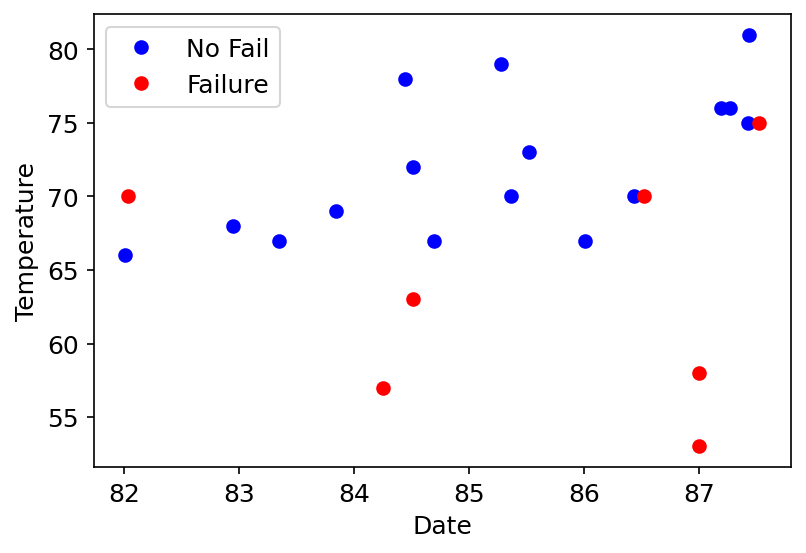

In [39]:
# student work here
failure = data['fail']

plt.plot(x[np.where(failure==0)], j[np.where(failure==0)],'bo', label='No Fail')
plt.plot(x[np.where(failure>0)], j[np.where(failure>0)],'ro', label='Failure')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()

### Exercise 13

It is unusually cold on the team's next race (30F) and the question to the pit crew is if the new carburator will be reliable. 
Based on what you have seen so far, what is your recommendation? Race or not? 

*student answer here*
Based on what I have seen so far, racing does not seem like a wise decision

### Exercise 14

Plot temperature and failure ('fail' column in data, failure = 1) against each other and evaluate their correlation using a Pearson and spearman ranking. Is there a significant correlation between race temperature and failure?

Text(0, 0.5, 'Temp')

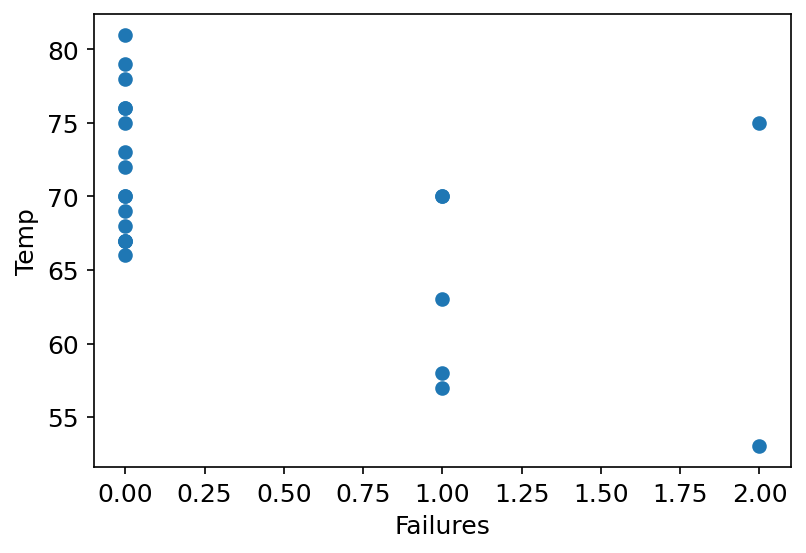

In [41]:
# student work here
plt.scatter(failure, j)
plt.xlabel('Failures')
plt.ylabel('Temp')

### Exercise 15

Evaluating the above plot and correlation statistics in Exercise 14, would you recommend racing with an air temperature of 30F? 

*student answer here*
No! Based on what I have seen, when racing at temperatures below 65F the reliablity of the carbuator decreases dramatically

<hr>